Doğruluk Oranı: %50.64

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.54      0.64      0.59      2499
           1       0.46      0.44      0.45      2120
           2       0.04      0.00      0.01       241
           3       0.00      0.00      0.00       102
           4       0.00      0.00      0.00        19
           5       0.00      0.00      0.00        11
           6       0.00      0.00      0.00         7
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1

    accuracy                           0.51      5002
   macro avg       0.10      0.11      0.10      5002
weighted avg       0.47      0.51      0.48      5002



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


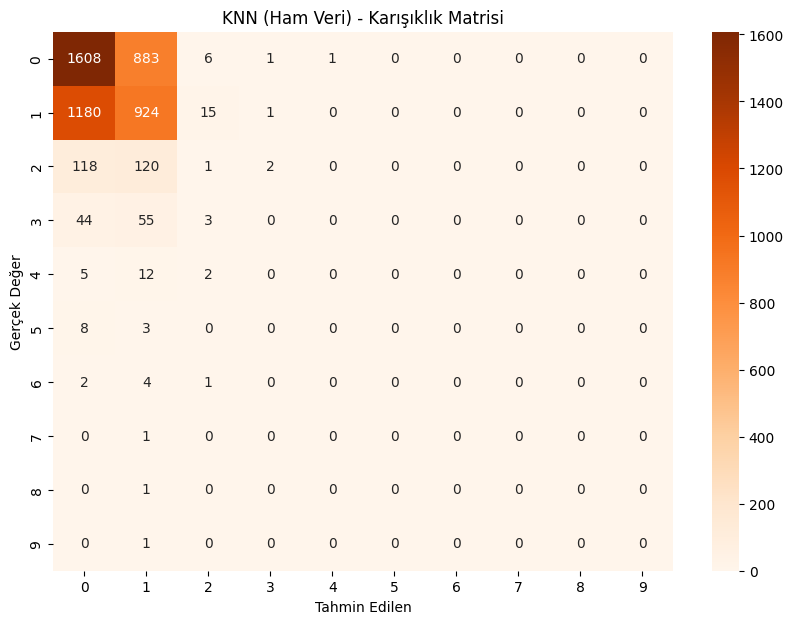

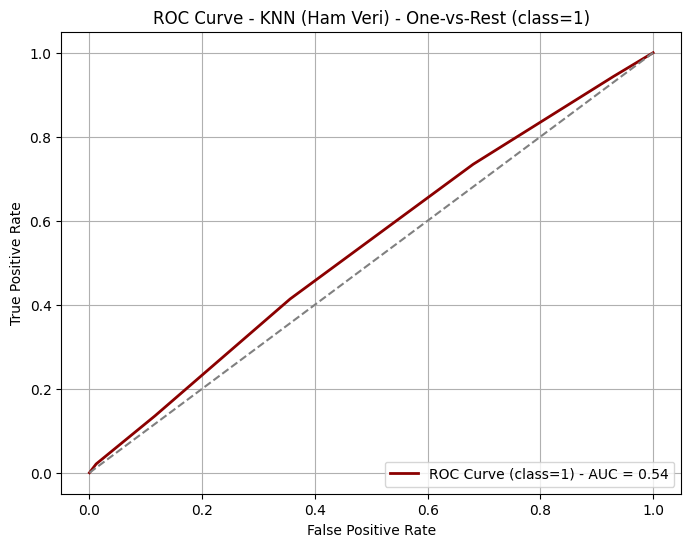

In [4]:
# Gerekli kütüphaneler
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# 📥 Veriyi yükle (HAM VERİ, iyileştirme yok)
columns = ['S1', 'C1', 'S2', 'C2', 'S3', 'C3', 'S4', 'C4', 'S5', 'C5', 'class']
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand-training-true.data"
df = pd.read_csv(url, header=None, names=columns)

#  Giriş ve hedef değişkenleri ayır
X = df.drop("class", axis=1)
y = df["class"]

#  Özellikleri ölçeklendir (KNN için gerekli)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#  Eğitim/test ayır
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# 🤖 KNN modelini kur ve eğit (k=5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

#  Tahmin yap
y_pred = knn.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Doğruluk Oranı: %{acc * 100:.2f}")
print("\nSınıflandırma Raporu:")
print(classification_report(y_test, y_pred))

#  Karışıklık Matrisi
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges")
plt.title("KNN (Ham Veri) - Karışıklık Matrisi")
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek Değer")
plt.show()

#  ROC Eğrisi (One-vs-Rest - class=1)
y_test_bin = label_binarize(y_test, classes=np.unique(y))
y_score = knn.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test_bin[:, 1], y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkred', lw=2, label=f"ROC Curve (class=1) - AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - KNN (Ham Veri) - One-vs-Rest (class=1)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


Doğruluk Oranı: %55.74

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.59      0.63      0.61      2499
           1       0.53      0.56      0.54      2109
           2       0.38      0.11      0.17       241
           3       0.25      0.10      0.15       106
           4       0.25      0.15      0.19        20
           5       1.00      0.18      0.31        11
           6       0.00      0.00      0.00         8
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1

    accuracy                           0.56      4998
   macro avg       0.30      0.17      0.20      4998
weighted avg       0.55      0.56      0.55      4998



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


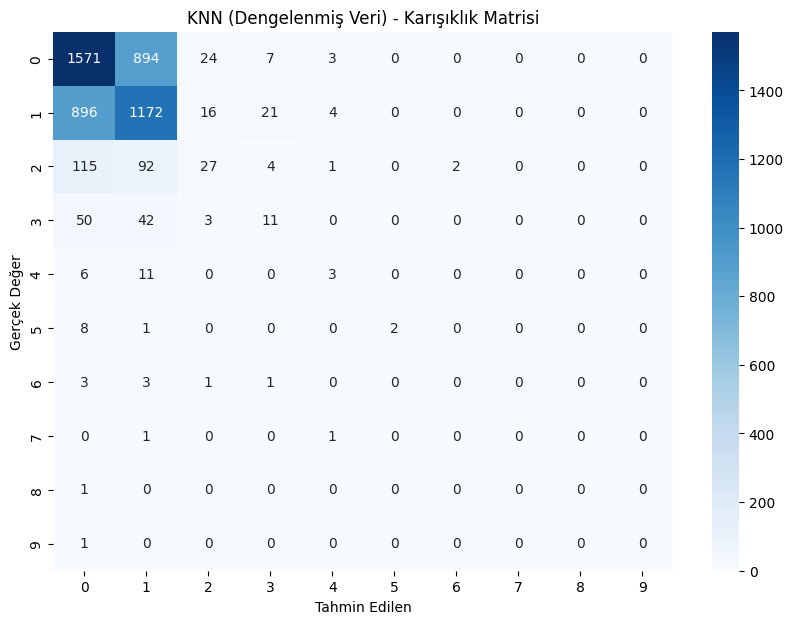

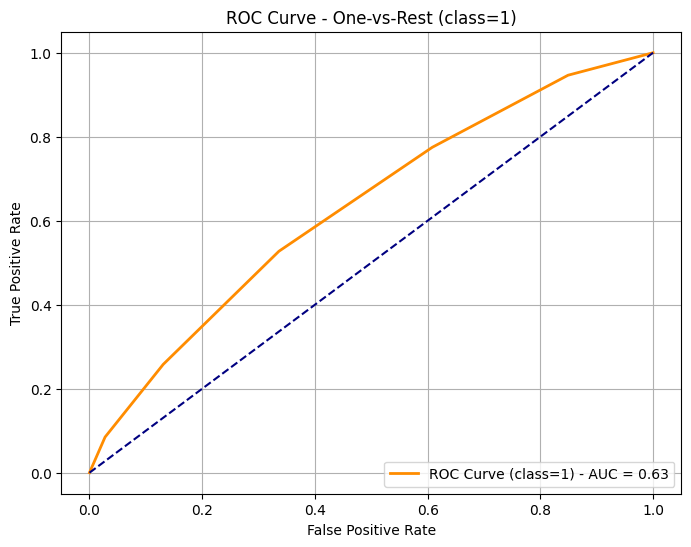

In [3]:
#  Gerekli kütüphaneler
import pandas as pd
import numpy as np
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

#  Veriyi yükle
columns = ['S1', 'C1', 'S2', 'C2', 'S3', 'C3', 'S4', 'C4', 'S5', 'C5', 'class']
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand-training-true.data"
df = pd.read_csv(url, header=None, names=columns)

#  Oversampling ile sınıf dengesini düzelt
df_majority = df[df["class"] == 0]
df_minority = df[df["class"] != 0]
df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=42)
df_balanced = pd.concat([df_majority, df_minority_upsampled])

#  Giriş ve hedef değişkenleri ayır
X = df_balanced.drop("class", axis=1)
y = df_balanced["class"]

#  Özellikleri ölçeklendir
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#  Eğitim/test ayır
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

#  KNN modelini kur ve eğit
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

#  Tahmin yap
y_pred = knn.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Doğruluk Oranı: %{acc * 100:.2f}")
print("\nSınıflandırma Raporu:")
print(classification_report(y_test, y_pred))

#  Karışıklık Matrisi
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("KNN (Dengelenmiş Veri) - Karışıklık Matrisi")
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek Değer")
plt.show()

#  ROC Eğrisi için: One-vs-Rest yap
from sklearn.preprocessing import label_binarize

# Etiketleri ikili formata çevir
y_test_bin = label_binarize(y_test, classes=np.unique(y))
y_score = knn.predict_proba(X_test)

# Örnek olarak sadece class=1 için ROC eğrisi çizelim
fpr, tpr, _ = roc_curve(y_test_bin[:, 1], y_score[:, 1])
roc_auc = auc(fpr, tpr)

#  ROC eğrisi çizimi
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC Curve (class=1) - AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - One-vs-Rest (class=1)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
